In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

In [3]:
data_org = pd.read_csv("/content/drive/MyDrive/2022-1/2022-1 DScover/01. 태양광 프로젝트/태양광 프로젝트!/merged_final.csv")
data = data_org.copy()
data.head()

,area,date,generation,avgTa,avgWs,avgRhm,ssDur,sumSsHr,sumGsr,avgTca,PM10,PM25
0,강원도,2016-01-01,144.042204,5.1,4.8,33.0,9.6,8.8,10.92,0.8,35.666667,27.298611
1,강원도,2016-01-02,109.358713,9.1,4.9,43.8,9.6,8.7,10.06,0.8,37.916667,26.375000
2,강원도,2016-01-03,156.699494,9.0,2.6,55.8,9.6,7.2,8.68,0.8,58.944444,44.354167
3,강원도,2016-01-04,225.889445,7.4,3.4,33.8,9.6,8.4,9.63,0.8,71.569444,51.819444
4,강원도,2016-01-05,208.994071,3.0,3.7,16.3,9.7,7.6,10.03,0.8,21.222222,11.618056


In [5]:
print('데이터 세트의 Shape:', data.shape)
print('\n전체 피처의 type\n', data.dtypes.value_counts())
isnull_series = data.isnull().sum()
print('\nNull 칼럼과 그 건수:\n', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (31059, 12)

전체 피처의 type
 float64    10
object      2
dtype: int64

Null 칼럼과 그 건수:
 Series([], dtype: int64)


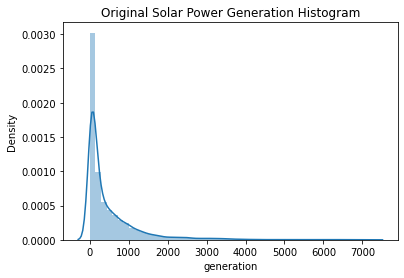

In [ ]:
# 타깃의 분포도
plt.title('Original Solar Power Generation Histogram')
sns.distplot(data['generation'])

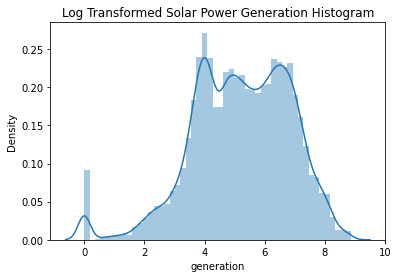

In [ ]:
# 로그 변환
plt.title('Log Transformed Solar Power Generation Histogram')
log_generation = np.log1p(data['generation'])
sns.distplot(log_generation)

In [4]:
features = data.iloc[:,2:]
features.head()

,generation,avgTa,avgWs,avgRhm,ssDur,sumSsHr,sumGsr,avgTca,PM10,PM25
0,144.042204,5.1,4.8,33.0,9.6,8.8,10.92,0.8,35.666667,27.298611
1,109.358713,9.1,4.9,43.8,9.6,8.7,10.06,0.8,37.916667,26.375000
2,156.699494,9.0,2.6,55.8,9.6,7.2,8.68,0.8,58.944444,44.354167
3,225.889445,7.4,3.4,33.8,9.6,8.4,9.63,0.8,71.569444,51.819444
4,208.994071,3.0,3.7,16.3,9.7,7.6,10.03,0.8,21.222222,11.618056


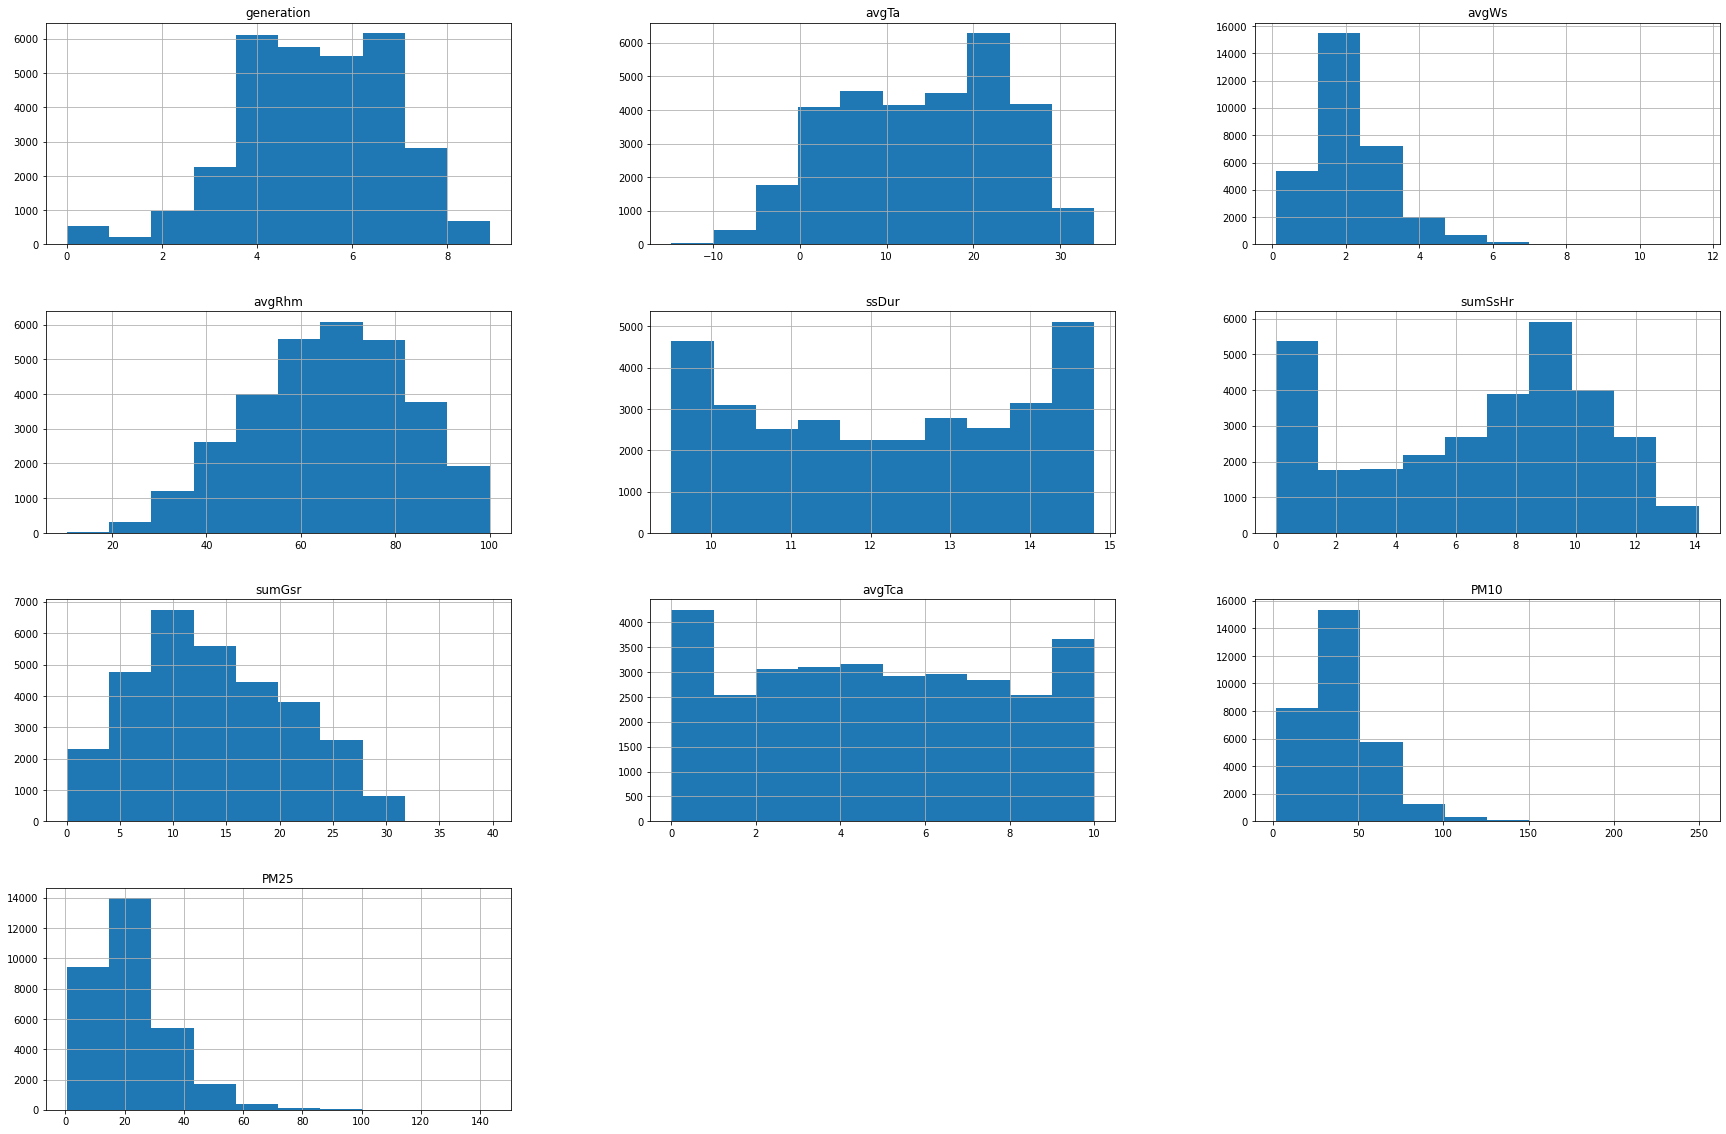

In [ ]:
h = features.hist(figsize=(30,20))

# MinMaxScaler

In [5]:
minMaxScale_df= features[['generation', 'avgTa', 'avgWs','avgRhm','ssDur','sumSsHr','sumGsr','avgTca','PM10','PM25']]
minMaxScale_df.head()

,generation,avgTa,avgWs,avgRhm,ssDur,sumSsHr,sumGsr,avgTca,PM10,PM25
0,144.042204,5.1,4.8,33.0,9.6,8.8,10.92,0.8,35.666667,27.298611
1,109.358713,9.1,4.9,43.8,9.6,8.7,10.06,0.8,37.916667,26.375000
2,156.699494,9.0,2.6,55.8,9.6,7.2,8.68,0.8,58.944444,44.354167
3,225.889445,7.4,3.4,33.8,9.6,8.4,9.63,0.8,71.569444,51.819444
4,208.994071,3.0,3.7,16.3,9.7,7.6,10.03,0.8,21.222222,11.618056


In [6]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환
scaler.fit(minMaxScale_df)
minMaxScaled_df = scaler.transform(minMaxScale_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환 -> DataFrame으로 변환
minMaxScaled_df = pd.DataFrame(data=minMaxScaled_df, columns=['generation', 'avgTa', 'avgWs','avgRhm','ssDur','sumSsHr','sumGsr','avgTca','PM10','PM25'])
print('feature들의 최솟값')
print(minMaxScaled_df.min())
print('\nfeature들의 최댓값')
print(minMaxScaled_df.max())

feature들의 최솟값
generation    0.0
avgTa         0.0
avgWs         0.0
avgRhm        0.0
ssDur         0.0
sumSsHr       0.0
sumGsr        0.0
avgTca        0.0
PM10          0.0
PM25          0.0
dtype: float64

feature들의 최댓값
generation    1.0
avgTa         1.0
avgWs         1.0
avgRhm        1.0
ssDur         1.0
sumSsHr       1.0
sumGsr        1.0
avgTca        1.0
PM10          1.0
PM25          1.0
dtype: float64


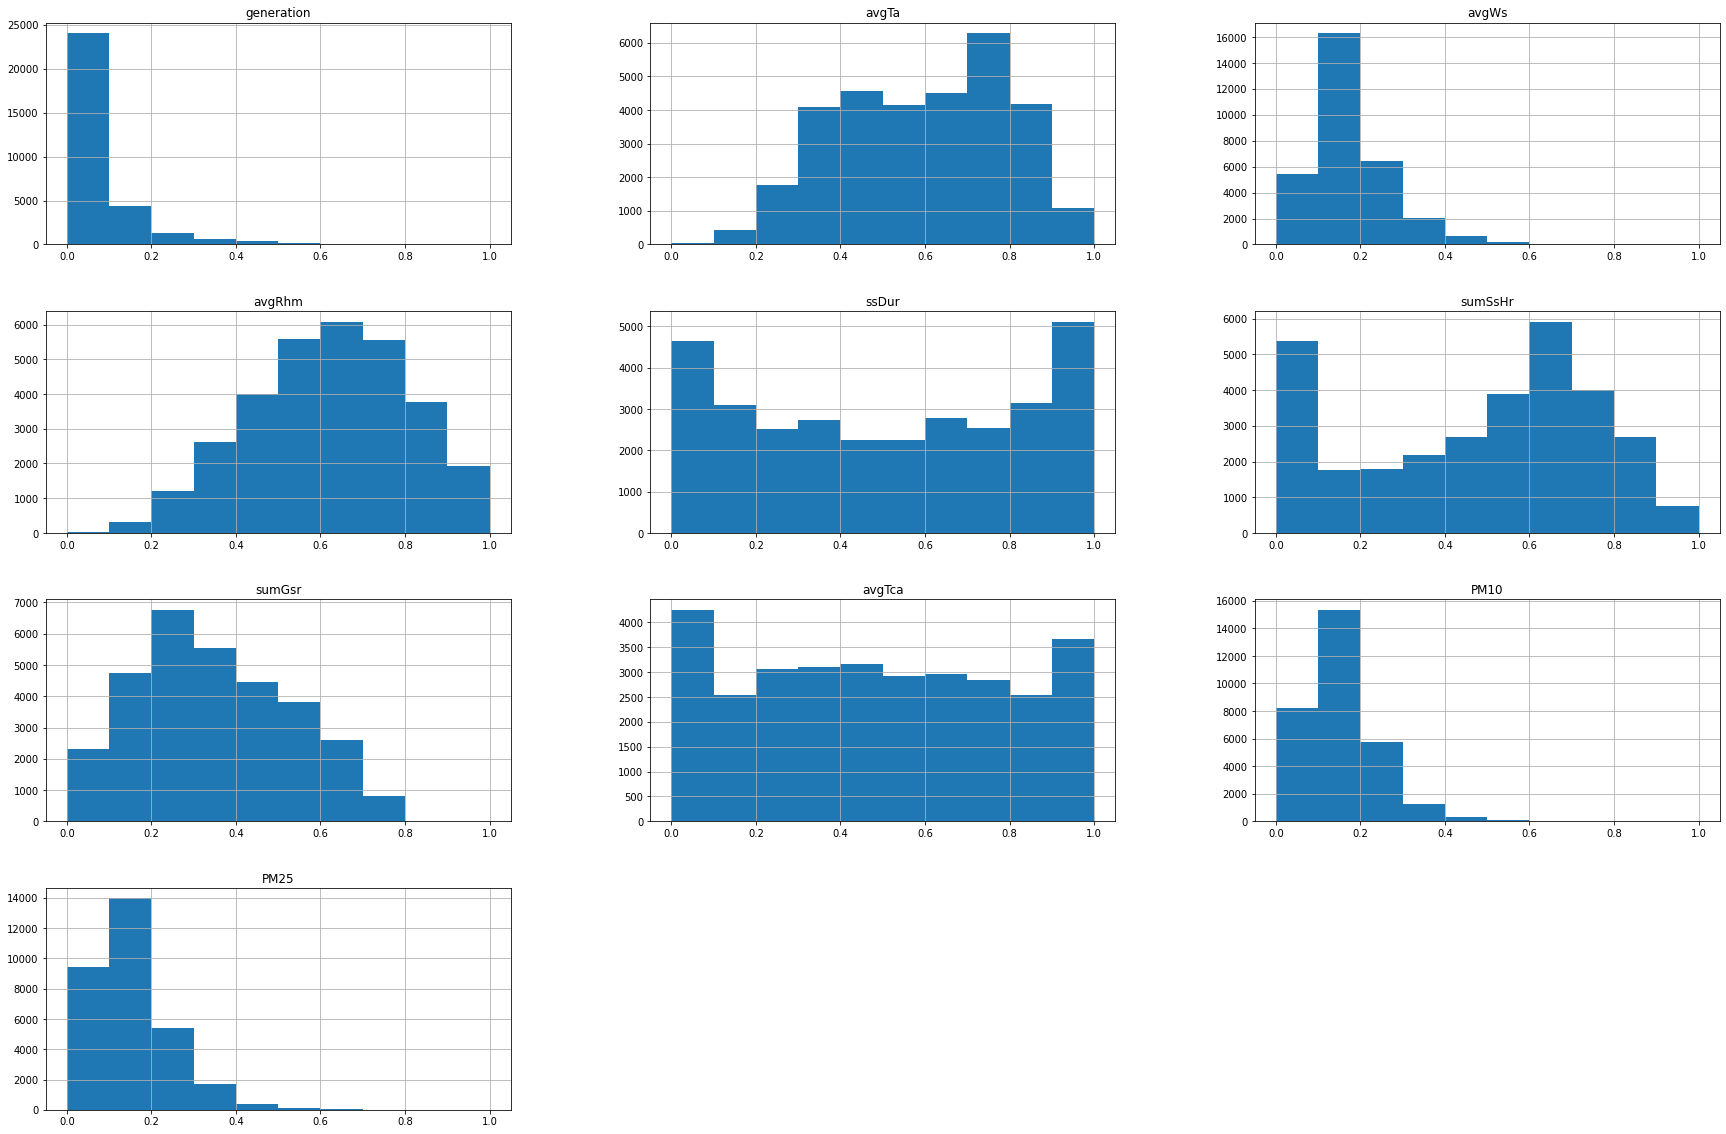

In [37]:
h = minMaxScaled_df.hist(figsize=(30,20))

# Skew

In [7]:
from scipy.stats import skew

features_index = minMaxScaled_df.dtypes[minMaxScaled_df.dtypes != 'object'].index
skew_features = minMaxScaled_df[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 칼럼 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

generation    3.233033
PM10          1.803973
PM25          1.648756
avgWs         1.492623
dtype: float64


In [8]:
# 왜곡 정도가 높은 피처 로그 변환
minMaxScaled_df[skew_features_top.index] = np.log1p(minMaxScaled_df[skew_features_top.index])

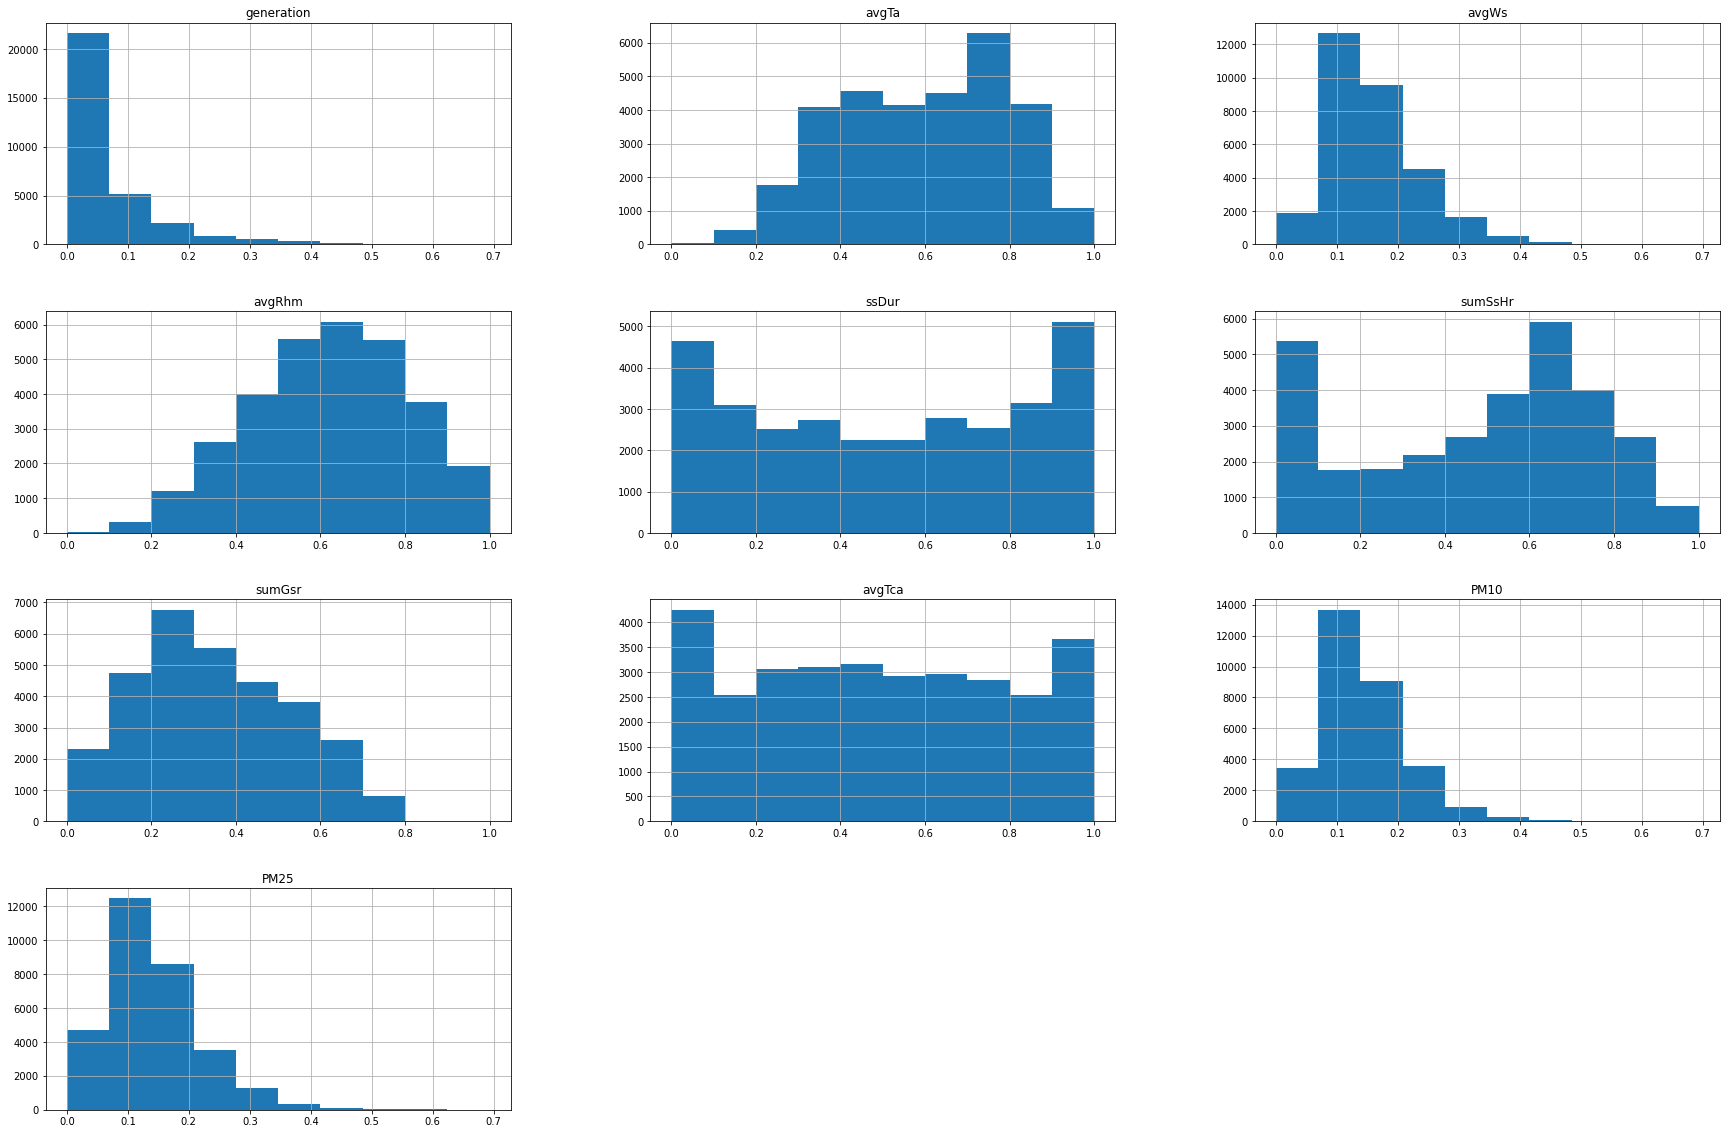

In [40]:
h = minMaxScaled_df.hist(figsize=(30,20))

# Scatterplot

Text(0.5, 0, 'Avg Temp')

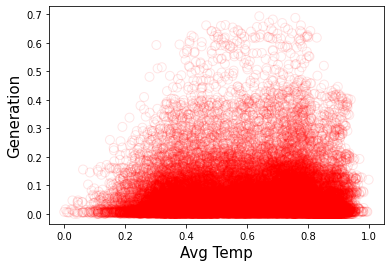

In [14]:
# 발전량 ~ 평균기온
plt.scatter(x = minMaxScaled_df['avgTa'], y = minMaxScaled_df['generation'], s=80, facecolors='none', edgecolors='r', alpha=0.1)
plt.ylabel('Generation', fontsize=15)
plt.xlabel('Avg Temp', fontsize=15)

Text(0.5, 0, 'Avg Wind Speed')

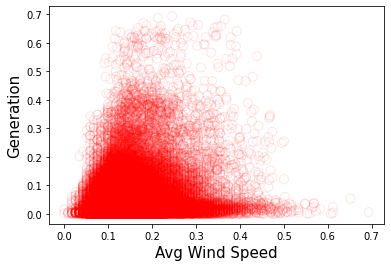

In [15]:
# 발전량 ~ 평균풍속
plt.scatter(x = minMaxScaled_df['avgWs'], y = minMaxScaled_df['generation'], s=80, facecolors='none', edgecolors='r', alpha=0.1)
plt.ylabel('Generation', fontsize=15)
plt.xlabel('Avg Wind Speed', fontsize=15)

Text(0.5, 0, 'Avg Rel Humidity')

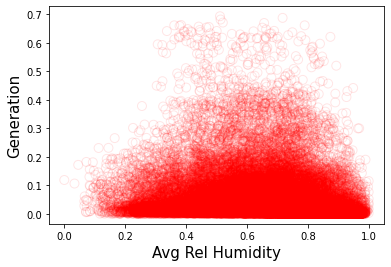

In [16]:
# 발전량 ~ 평균상대습도
plt.scatter(x = minMaxScaled_df['avgRhm'], y = minMaxScaled_df['generation'], s=80, facecolors='none', edgecolors='r', alpha=0.1)
plt.ylabel('Generation', fontsize=15)
plt.xlabel('Avg Rel Humidity', fontsize=15)

Text(0.5, 0, 'Sun Duration')

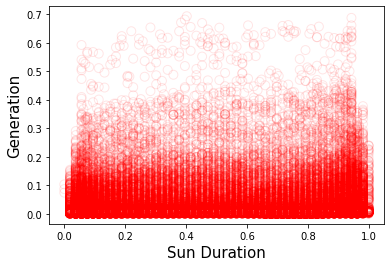

In [17]:
# 발전량 ~ 가조시간
plt.scatter(x = minMaxScaled_df['ssDur'], y = minMaxScaled_df['generation'], s=80, facecolors='none', edgecolors='r', alpha=0.1)
plt.ylabel('Generation', fontsize=15)
plt.xlabel('Sun Duration', fontsize=15)

Text(0.5, 0, 'Total Sun Duration Hrs')

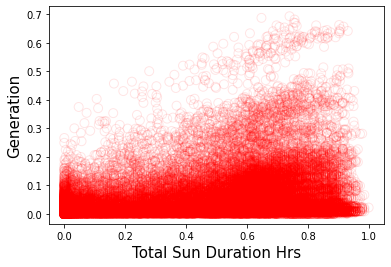

In [18]:
# 발전량 ~ 합계일조시간
plt.scatter(x = minMaxScaled_df['sumSsHr'], y = minMaxScaled_df['generation'], s=80, facecolors='none', edgecolors='r', alpha=0.1)
plt.ylabel('Generation', fontsize=15)
plt.xlabel('Total Sun Duration Hrs', fontsize=15)

Text(0.5, 0, 'Total Sum of Solar Radiation')

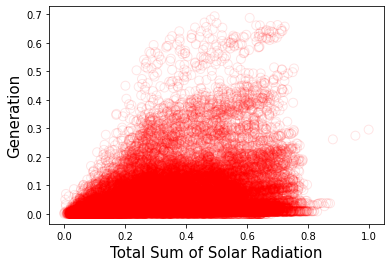

In [12]:
# 발전량 ~ 합계일사량
plt.scatter(x = minMaxScaled_df['sumGsr'], y = minMaxScaled_df['generation'], s=80, facecolors='none', edgecolors='r', alpha=0.1)
plt.ylabel('Generation', fontsize=15)
plt.xlabel('Total Sum of Solar Radiation', fontsize=15)

In [13]:
cond1 = minMaxScaled_df['generation'] > 0.2
cond2 = minMaxScaled_df['sumGsr'] > 0.8
outlier_index = minMaxScaled_df[cond1 & cond2].index

print('이상치 레코드 index :', outlier_index.values)
print('이상치 삭제 전 minMaxScaled_df shape: ', minMaxScaled_df.shape)

minMaxScaled_df.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 minMaxScaled_df shape: ', minMaxScaled_df.shape)

이상치 레코드 index : [28625 28626 28627]
이상치 삭제 전 minMaxScaled_df shape:  (31059, 10)
이상치 삭제 후 minMaxScaled_df shape:  (31056, 10)


Text(0.5, 0, 'Avg Cloud')

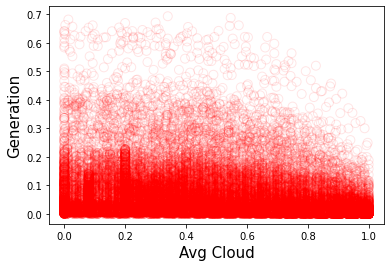

In [20]:
 # 발전량 ~ 평균전운량
plt.scatter(x = minMaxScaled_df['avgTca'], y = minMaxScaled_df['generation'], s=80, facecolors='none', edgecolors='r', alpha=0.1)
plt.ylabel('Generation', fontsize=15)
plt.xlabel('Avg Cloud', fontsize=15)

# 날짜 인코딩

In [21]:
data.head()

,area,date,generation,avgTa,avgWs,avgRhm,ssDur,sumSsHr,sumGsr,avgTca,PM10,PM25
0,강원도,2016-01-01,144.042204,5.1,4.8,33.0,9.6,8.8,10.92,0.8,35.666667,27.298611
1,강원도,2016-01-02,109.358713,9.1,4.9,43.8,9.6,8.7,10.06,0.8,37.916667,26.375000
2,강원도,2016-01-03,156.699494,9.0,2.6,55.8,9.6,7.2,8.68,0.8,58.944444,44.354167
3,강원도,2016-01-04,225.889445,7.4,3.4,33.8,9.6,8.4,9.63,0.8,71.569444,51.819444
4,강원도,2016-01-05,208.994071,3.0,3.7,16.3,9.7,7.6,10.03,0.8,21.222222,11.618056


In [28]:
date_df = data.iloc[:,1:2]
date_df.head()

,date
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05


In [30]:
date_df['day'] = date_df['date'].str.split('-').str[2]
date_df['month'] = date_df['date'].str.split('-').str[1]
date_df['year'] = date_df['date'].str.split('-').str[0]

In [32]:
date_df.drop(outlier_index, axis=0, inplace=True)
date_df.drop('date', axis=1, inplace=True)
date_df.head()

,day,month,year
0,01,01,2016
1,02,01,2016
2,03,01,2016
3,04,01,2016
4,05,01,2016


# data_df + minMaxScaled_df 

In [42]:
result1 = pd.concat([date_df, minMaxScaled_df], axis=1)
result1 = result1[['generation', 'day','month','year', 'avgTa', 'avgWs','avgRhm','ssDur','sumSsHr','sumGsr','avgTca','PM10','PM25']]
result1.head()

,generation,day,month,year,avgTa,avgWs,avgRhm,ssDur,sumSsHr,sumGsr,avgTca,PM10,PM25
0,0.019749,01,01,2016,0.408624,0.342664,0.252232,0.018868,0.624113,0.274559,0.08,0.128358,0.172267
1,0.015029,02,01,2016,0.490760,0.348818,0.372768,0.018868,0.617021,0.252897,0.08,0.136308,0.166807
2,0.021466,03,01,2016,0.488706,0.196710,0.506696,0.018868,0.510638,0.218136,0.08,0.207700,0.268084
3,0.030800,04,01,2016,0.455852,0.252280,0.261161,0.018868,0.595745,0.242065,0.08,0.248237,0.307297
4,0.028529,05,01,2016,0.365503,0.272348,0.065848,0.037736,0.539007,0.252141,0.08,0.075760,0.075261


In [41]:
result1.shape

(31056, 13)

# IQR 방식으로 아웃라이어 제거

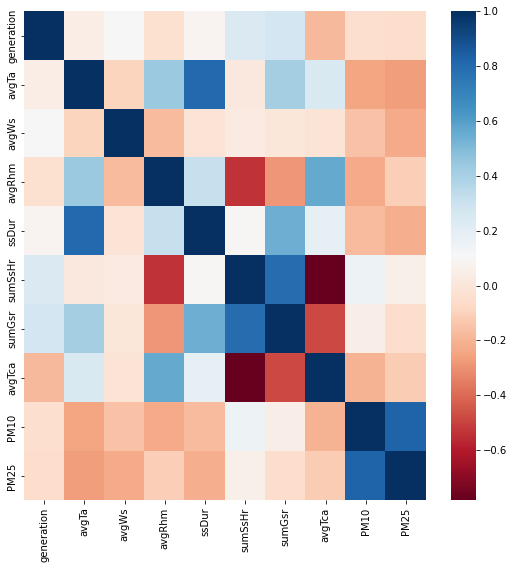

In [43]:
plt.figure(figsize=(9,9))
corr = result1.corr()
sns.heatmap(corr, cmap='RdBu')

In [45]:
def get_outlier(df=None, column=None, weight=1.5):
  fraud = df[column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.vlaues, 75)

  iqr = quantile_75 - quantile_25
  iqr_weight = boundary * weight

  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].outlier_index

  return outlier_index

In [ ]:
outlier_index = get_outlier(df=result1)